In [ ]:
import tensorflow as tf

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels), (testing_images, testing_labels) = fmnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


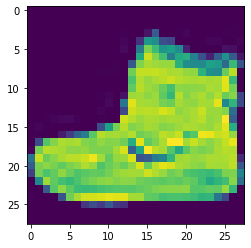

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])

In [ ]:
training_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [ ]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255
testing_images = testing_images.reshape(10000, 28, 28, 1)
testing_images = testing_images / 255

In [ ]:
training_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
training_images[0].shape

(28, 28, 1)

In [ ]:
model = tf.keras.models.Sequential(
    [ 
      tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1024, activation = 'relu'),

      tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [ ]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(training_images, training_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4680 - accuracy: 0.8328
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3143 - accuracy: 0.8856
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2695 - accuracy: 0.9008
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2409 - accuracy: 0.9096
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2180 - accuracy: 0.9189
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1987 - accuracy: 0.9257
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1789 - accuracy: 0.9321
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1637 - accuracy: 0.9380
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1502 - accuracy: 0.9432
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.134

In [ ]:
model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3367 - accuracy: 0.8819


[0.33672603964805603, 0.8819000124931335]

In [ ]:
prediction = model.predict(testing_images)
print(prediction[0])

[2.7667437e-07 1.0092439e-09 5.7376170e-09 4.7576814e-11 9.5853480e-08 2.7616549e-04 3.9618811e-07 1.7340661e-03 3.2502097e-08 9.9798894e-01]


In [ ]:
testing_labels[0]

9

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1